In [1]:
import pandas as pd

df = pd.DataFrame({
    'Edad': [23, 25, None, 22, 120, 25],
    'Genero': ['M', 'F', 'F', None, 'F', 'M'],
    'Ingresos': [40000, 42000, 38000, 50000, None, 42000]
})

print(df)
print()
print(df.info)
print()
print(df.describe(include='all'))

    Edad Genero  Ingresos
0   23.0      M   40000.0
1   25.0      F   42000.0
2    NaN      F   38000.0
3   22.0   None   50000.0
4  120.0      F       NaN
5   25.0      M   42000.0

<bound method DataFrame.info of     Edad Genero  Ingresos
0   23.0      M   40000.0
1   25.0      F   42000.0
2    NaN      F   38000.0
3   22.0   None   50000.0
4  120.0      F       NaN
5   25.0      M   42000.0>

              Edad Genero    Ingresos
count     5.000000      5      5.0000
unique         NaN      2         NaN
top            NaN      F         NaN
freq           NaN      3         NaN
mean     43.000000    NaN  42400.0000
std      43.063906    NaN   4560.7017
min      22.000000    NaN  38000.0000
25%      23.000000    NaN  40000.0000
50%      25.000000    NaN  42000.0000
75%      25.000000    NaN  42000.0000
max     120.000000    NaN  50000.0000


## Manejo de valores faltantes

In [2]:
# Eliminar filas con al menos un valor nulo
df_limpio = df.dropna()
print("Filas sin nulos:\n", df_limpio)

Filas sin nulos:
    Edad Genero  Ingresos
0  23.0      M   40000.0
1  25.0      F   42000.0
5  25.0      M   42000.0


In [3]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
df['Edad'] = imputer.fit_transform(df[['Edad']])
print("Con imputación de edad:\n", df)

Con imputación de edad:
     Edad Genero  Ingresos
0   23.0      M   40000.0
1   25.0      F   42000.0
2   43.0      F   38000.0
3   22.0   None   50000.0
4  120.0      F       NaN
5   25.0      M   42000.0


## Eliminar duplicados

In [4]:
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)
print("Con duplicados:\n", df)

Con duplicados:
     Edad Genero  Ingresos
0   23.0      M   40000.0
1   25.0      F   42000.0
2   43.0      F   38000.0
3   22.0   None   50000.0
4  120.0      F       NaN
5   25.0      M   42000.0
6   23.0      M   40000.0


In [5]:
# Eliminar duplicados
df_sin_duplicaos = df.drop_duplicates()
print("Sin duplicados:\n", df_sin_duplicaos)

Sin duplicados:
     Edad Genero  Ingresos
0   23.0      M   40000.0
1   25.0      F   42000.0
2   43.0      F   38000.0
3   22.0   None   50000.0
4  120.0      F       NaN
5   25.0      M   42000.0


## Detección y manejo de valores atípicos (*Outliers*)

In [6]:
import numpy as np

df = df_sin_duplicaos
print(df)

    Edad Genero  Ingresos
0   23.0      M   40000.0
1   25.0      F   42000.0
2   43.0      F   38000.0
3   22.0   None   50000.0
4  120.0      F       NaN
5   25.0      M   42000.0


In [7]:
df_filtrado = df[df['Edad'] < 100]
print("Sin outliers extremos ene Edad:\n", df_filtrado)

Sin outliers extremos ene Edad:
    Edad Genero  Ingresos
0  23.0      M   40000.0
1  25.0      F   42000.0
2  43.0      F   38000.0
3  22.0   None   50000.0
5  25.0      M   42000.0


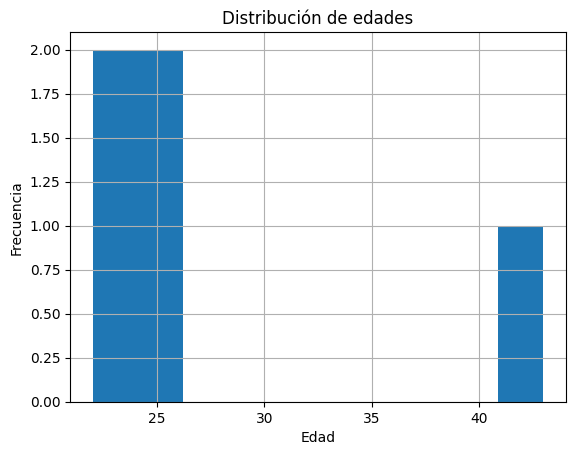

In [8]:
import matplotlib.pyplot as plt

df_filtrado['Edad'].hist()
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Corección de tipos de datos

In [10]:
df_filtrado = df[df['Ingresos'] > 1000].copy()
df_filtrado['Edad'] = df_filtrado['Edad'].astype(str)

In [11]:
df_filtrado['Edad'] = pd.to_numeric(df_filtrado['Edad'])
print("Tipos coregidos:\n", df_filtrado.dtypes)

Tipos coregidos:
 Edad        float64
Genero       object
Ingresos    float64
dtype: object


## Normalización y escalado

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_filtrado['Ingresos_norm'] = scaler.fit_transform(df_filtrado[['Ingresos']])
print("Ingresos normalizados:\n", df_filtrado)

Ingresos normalizados:
    Edad Genero  Ingresos  Ingresos_norm
0  23.0      M   40000.0       0.166667
1  25.0      F   42000.0       0.333333
2  43.0      F   38000.0       0.000000
3  22.0   None   50000.0       1.000000
5  25.0      M   42000.0       0.333333


## Codificación de variables categóricas

In [13]:
df_onehot = pd.get_dummies(df_filtrado, columns=['Genero'])
print(df_filtrado)
print(df_onehot)

   Edad Genero  Ingresos  Ingresos_norm
0  23.0      M   40000.0       0.166667
1  25.0      F   42000.0       0.333333
2  43.0      F   38000.0       0.000000
3  22.0   None   50000.0       1.000000
5  25.0      M   42000.0       0.333333
   Edad  Ingresos  Ingresos_norm  Genero_F  Genero_M
0  23.0   40000.0       0.166667     False      True
1  25.0   42000.0       0.333333      True     False
2  43.0   38000.0       0.000000      True     False
3  22.0   50000.0       1.000000     False     False
5  25.0   42000.0       0.333333     False      True


In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_filtrado['Genero_num'] = encoder.fit_transform(df_filtrado['Genero'].astype(str))
print("Con codificación de etiquetas:\n", df_filtrado)

Con codificación de etiquetas:
    Edad Genero  Ingresos  Ingresos_norm  Genero_num
0  23.0      M   40000.0       0.166667           1
1  25.0      F   42000.0       0.333333           0
2  43.0      F   38000.0       0.000000           0
3  22.0   None   50000.0       1.000000           2
5  25.0      M   42000.0       0.333333           1


## Limpieza y transformación de texto

In [26]:
#Ejemplo, preguntar en clase
df_texto = pd.DataFrame({'comentario': [
"¡Me encantó el producto!",
"Muy malo... no lo recomiendo.",
" Buen servicio, volveré. "
]})

print(df_texto)

                      comentario
0       ¡Me encantó el producto!
1  Muy malo... no lo recomiendo.
2       Buen servicio, volveré. 


In [27]:
df_texto['comentario_limpio'] = (
    df_texto['comentario'].str.lower()
    .str.strip()
    .str.replace(r'[^\w\s]', '', regex=True)
)

print(df_texto)

                      comentario          comentario_limpio
0       ¡Me encantó el producto!     me encantó el producto
1  Muy malo... no lo recomiendo.  muy malo no lo recomiendo
2       Buen servicio, volveré.       buen servicio volveré


## Ingeniería de características

In [28]:
# Agregaos columna de fecha de ingreso
df_filtrado['Fecha_ingreso'] = pd.to_datetime(['2021-05-10', '2020-07-15', '2022-02-14', '2023-07-01' ])


ValueError: Length of values (4) does not match length of index (5)

In [24]:
# Extraer el año y el mes
df_filtrado = df_filtrado.copy()
df_filtrado['Anio'] = df_filtrado['Fecha_ingreso'].dt.year
df_filtrado['Mes'] = df_filtrado['Fecha_ingreso'].dt.month
print(df_filtrado)


KeyError: 'Fecha_ingreso'

## División del conjunto de datos

In [19]:
from sklearn.model_selection import train_test_split
X = df_onehot.drop(['Ingresos', 'Ingresos_norm'], axis=1)
y = df_onehot['Ingresos_norm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:\n", X_train)
print("y_train:\n", y_train)

X_train:
    Edad  Genero_F  Genero_M
5  25.0     False      True
2  43.0      True     False
0  23.0     False      True
3  22.0     False     False
y_train:
 5    0.333333
2    0.000000
0    0.166667
3    1.000000
Name: Ingresos_norm, dtype: float64


## Selección de características

Seleccionar las 2 características mas relevantes respecto a 'Ingresos_norm'

In [20]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=2)
X_new = selector.fit_transform(X_train, y_train)
print(X_new)

[[25.  0.]
 [43.  1.]
 [23.  0.]
 [22.  0.]]


## Pipeline de preprocesamiento

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputar', SimpleImputer(strategy='mean')),
    ('escalar', StandardScaler())
])